In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sci
import scipy.stats as scistats
from mcareader import Mca
import os
import re

In [2]:
def extract_mca_data(file_path):
    data_values = []
    inside_data_section = False

    with open(file_path, 'r') as file:
        for line in file:
            line = line.strip()
            if line == "<<DATA>>":
                inside_data_section = True
                continue
            if line == "<<END>>":
                break
            if inside_data_section and line.isdigit():
                data_values.append(int(line))
    return data_values

In [7]:
directory = "team_battery"

# Regex to capture the float X from filenames like cal_10_(X).mca
pattern = re.compile(r"fe_\d+\_(\d*)\.mca")

# Temporary storage for (x_value, data_list)
temp_storage = []

for filename in os.listdir(directory):
    match = pattern.search(filename)
    if match:
        x_value = float(match.group(1))
        file_path = os.path.join(directory, filename)
        data = extract_mca_data(file_path)
        temp_storage.append((x_value, data))

# Sort by x_value
temp_storage.sort(key=lambda item: item[0])

# Separate into two lists
file_labels = [item[0] for item in temp_storage]
all_data_lists = [item[1] for item in temp_storage]

print(f"Loaded {len(all_data_lists)} files in ascending order of X.")
for i, data_list in enumerate(all_data_lists):
    print(f"File {i+1} (X={file_labels[i]}): {len(data_list)} points")

Loaded 22 files in ascending order of X.
File 1 (X=1388.0): 1024 points
File 2 (X=1448.0): 1024 points
File 3 (X=1508.0): 1024 points
File 4 (X=1568.0): 1024 points
File 5 (X=1568.0): 1024 points
File 6 (X=1628.0): 1024 points
File 7 (X=1688.0): 1024 points
File 8 (X=1748.0): 1024 points
File 9 (X=1748.0): 1024 points
File 10 (X=1808.0): 1024 points
File 11 (X=1868.0): 1024 points
File 12 (X=1928.0): 1024 points
File 13 (X=1928.0): 1024 points
File 14 (X=1988.0): 1024 points
File 15 (X=2048.0): 1024 points
File 16 (X=2048.0): 1024 points
File 17 (X=2108.0): 1024 points
File 18 (X=2168.0): 1024 points
File 19 (X=2168.0): 1024 points
File 20 (X=2228.0): 1024 points
File 21 (X=2288.0): 1024 points
File 22 (X=2348.0): 1024 points


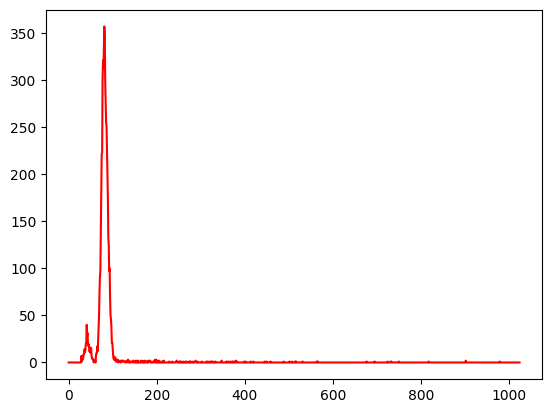

In [23]:
index=5
plt.plot(np.linspace(0,len(all_data_lists[index]),1024),all_data_lists[index],color='red')